In [1]:
from census_mapper import zip_shp_to_gdf, get_census_variables, gen_random_points_poly, num_points_in_gdf
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
%matplotlib inline

[variables](http://api.census.gov/data/2014/acs1/variables.html)

In [3]:
#zipped_shp = 'http://www2.census.gov/geo/tiger/TIGER2010/BG/2010/tl_2010_06001_bg10.zip'
zipped_shp = 'http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_06_tract_500k.zip'
gdf = zip_shp_to_gdf(zipped_shp).to_crs(epsg=3310)
alameda_tract_geo = gdf[gdf.COUNTYFP=='001'].set_index("GEOID")['geometry']
alameda_tract_geo.head()

GEOID
06001400600    POLYGON ((-199300.688113818 -16762.19245834276...
06001400900    POLYGON ((-200850.362981894 -17209.57505400805...
06001401400    POLYGON ((-200272.877721252 -18657.94667388964...
06001403000    POLYGON ((-200009.0006981648 -21782.8582654749...
06001405902    POLYGON ((-197607.799415486 -22832.02230660664...
Name: geometry, dtype: object

In [4]:
var_list = ['B19013_001E']
bar_labels = ['income']

alameda_income = get_census_variables(2015, 'acs5', 'tract', {'county':'001', 'state':'06'}, ['B19013_001E'], ['income'])
alameda_income = alameda_income['income'].dropna().astype(int)

alameda_income = gpd.GeoDataFrame(geometry = alameda_tract_geo, data = alameda_income)

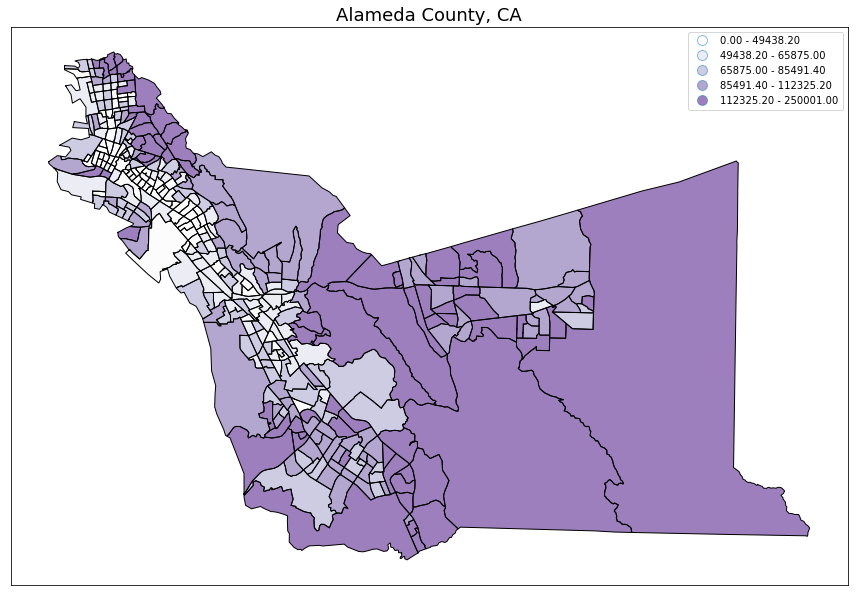

In [5]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set(aspect='equal', xticks=[], yticks=[])
alameda_income.plot(column= 'income', ax = ax, scheme='QUANTILES', cmap='Purples', legend=True)
plt.title('Alameda County, CA', size = 18)

In [6]:
bgfile_name = 'https://www2.census.gov/geo/tiger/TIGER2010/BG/2010/tl_2010_06001_bg10.zip'
alameda_bg_geo = zip_shp_to_gdf(bgfile_name).to_crs(epsg=3310).set_index("GEOID10")['geometry']

water_file_name = 'https://www2.census.gov/geo/tiger/TIGER2010/AREAWATER/tl_2010_06001_areawater.zip'
alameda_water_geo = zip_shp_to_gdf(water_file_name).to_crs(epsg=3310)['geometry'].unary_union



In [ ]:
alameda_bg_geo_cleaned = alameda_bg_geo.difference(alameda_water_geo)
alameda_bg_geo_cleaned = alameda_bg_geo_cleaned[alameda_bg_geo_cleaned.geometry.notnull()]

In [8]:
varlist = ['B02001_001E', 'B03002_003E', 'B03002_012E', 'B02001_002E', 'B02001_003E', 'B02001_005E', 'B02001_004E', 'B02001_006E', 'B02001_007E', 'B02001_008E']
names = ['total', 'white_nhs', 'hispanic', 'white','black', 'asian', 'ai_an', 'nh_pi', 'other', 'two_plus']

alameda_dems = get_census_variables(2015, 'acs5', 'block group', 
                                   {'county':'001', 'state':'06'}, varlist, names)

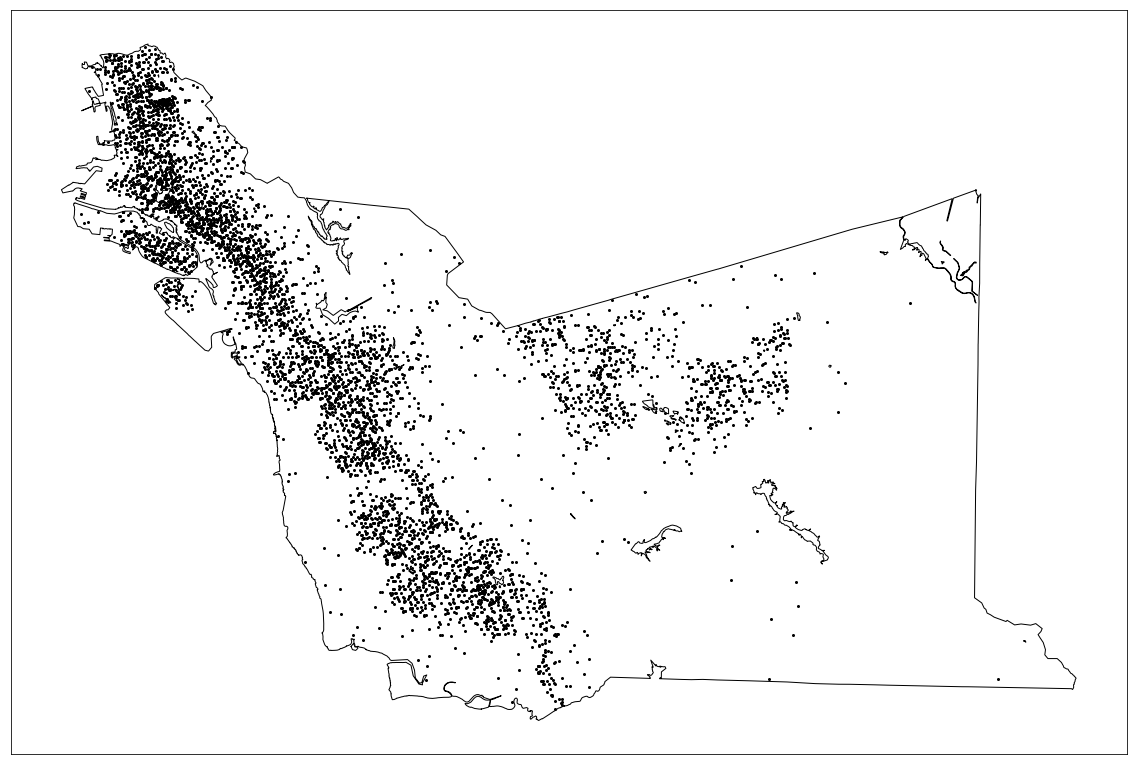

In [9]:
ps = num_points_in_gdf(geometry = alameda_bg_geo_cleaned, values=alameda_dems['total'], points_per_value = 250, seed=10)
fig, ax = plt.subplots(figsize=(20,20))
ax.set(aspect='equal', xticks=[], yticks=[])
union = gpd.GeoSeries(alameda_bg_geo_cleaned.unary_union)
union.plot(ax=ax, color='white')
ps.plot(ax=ax, markersize=2, color='black')

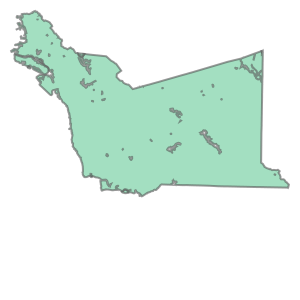

In [47]:
union.iloc[0]

In [ ]:
place_name = 'https://www2.census.gov/geo/tiger/TIGER2010/PLACE/2010/tl_2010_{}_place10.zip'.format(county_fips[:2])
    place_geo = zip_shp_to_gdf(place_name)[['NAME10','geometry']]
    place_geo = gpd.GeoDataFrame(place_geo, geometry = place_geo.centroid).to_crs(epsg=epsg)
    place_geo = place_geo[place_geo.within(union)]

In [ ]:
ps = num_points_in_gdf(geometry = alameda_bg_geo_cleaned, values=alameda_dems['black'], points_per_value = 250, seed=10)
fig, ax = plt.subplots(figsize=(20,20))
ax.set(aspect='equal', xticks=[], yticks=[])
union = gpd.GeoSeries(alameda_bg_geo_cleaned.unary_union)
union.plot(ax=ax, color='white')
ps.plot(ax=ax, markersize=2, color='black')

In [ ]:
ps = num_points_in_gdf(geometry = alameda_bg_geo_cleaned, values=alameda_dems['hispanic'], points_per_value = 250, seed=10)
fig, ax = plt.subplots(figsize=(20,20))
ax.set(aspect='equal', xticks=[], yticks=[])
union = gpd.GeoSeries(alameda_bg_geo_cleaned.unary_union)
union.plot(ax=ax, color='white')
ps.plot(ax=ax, markersize=2, color='black')

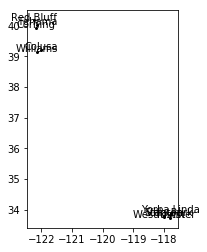

In [32]:

x = place_geo[['NAME10','geometry']]
x = gpd.GeoDataFrame(x, geometry=x.centroid)
ax = x[:10].plot(color='black')
labes = x[:10].apply(lambda z:ax.annotate(s=z.NAME10, xy=z.geometry.coords[0], ha='center'), axis=1)
#x[:10].apply(lambda x: ax.annotate(s=x.NAME10, xy=x.centroid.coords[0], ha='center'),axis=1);


In [50]:
def county_plot(county_fips, pts_per_person, place_labels = True, epsg = 2163, seed=10):
    bgfile_name = 'https://www2.census.gov/geo/tiger/TIGER2010/BG/2010/tl_2010_{}_bg10.zip'.format(county_fips)
    bg_geo = zip_shp_to_gdf(bgfile_name).to_crs(epsg=epsg).set_index("GEOID10")['geometry']

    water_file_name = 'https://www2.census.gov/geo/tiger/TIGER2010/AREAWATER/tl_2010_{}_areawater.zip'.format(county_fips)
    water_geo = zip_shp_to_gdf(water_file_name).to_crs(epsg=epsg)['geometry'].unary_union

    bg_geo_cleaned = bg_geo.difference(water_geo)
    bg_geo_cleaned = bg_geo_cleaned[bg_geo_cleaned.geometry.notnull()]
    union = gpd.GeoSeries(bg_geo_cleaned.unary_union)

    if place_labels:
        place_name = 'https://www2.census.gov/geo/tiger/TIGER2010/PLACE/2010/tl_2010_{}_place10.zip'.format(county_fips[:2])
        place_geo = zip_shp_to_gdf(place_name)[['NAME10','geometry']]
        place_geo = gpd.GeoDataFrame(place_geo, geometry = place_geo.centroid).to_crs(epsg=epsg)
        place_geo = place_geo[place_geo.within(union.iloc[0])]


    varlist = ['B02001_001E', 'B03002_003E', 'B03002_012E', 'B02001_002E', 'B02001_003E', 'B02001_005E', 'B02001_004E', 'B02001_006E', 'B02001_007E', 'B02001_008E']
    names = ['total', 'white_nhs', 'hispanic', 'white','black', 'asian', 'ai_an', 'nh_pi', 'other', 'two_plus']

    dems = get_census_variables(2015, 'acs5', 'block group', 
                                   {'county':county_fips[2:], 'state':county_fips[:2]}, varlist, names)
    
   
    ps = num_points_in_gdf(geometry = bg_geo_cleaned, values=dems['total'], points_per_value = pts_per_person, seed=seed)
    fig, ax = plt.subplots(figsize=(15,15))
    ax.set(aspect='equal', xticks=[], yticks=[])
    union.plot(ax=ax, color='white')
    ps.plot(ax=ax, markersize=2, color='black')
    
    if place_labels:
        labels = place_geo.apply(lambda z:ax.annotate(s=z.NAME10, xy=z.geometry.coords[0], ha='center'), axis=1)
    

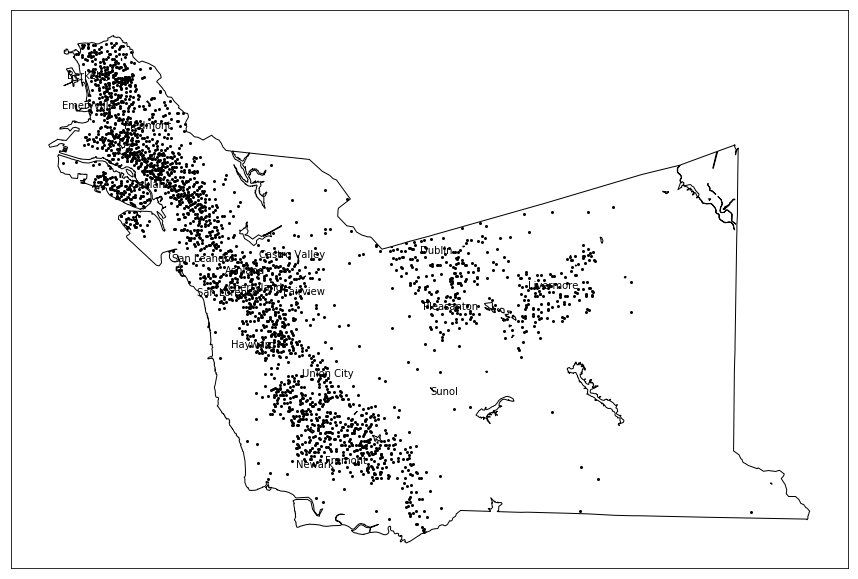

In [51]:
county_plot('06001', pts_per_person = 500, epsg = 3310)

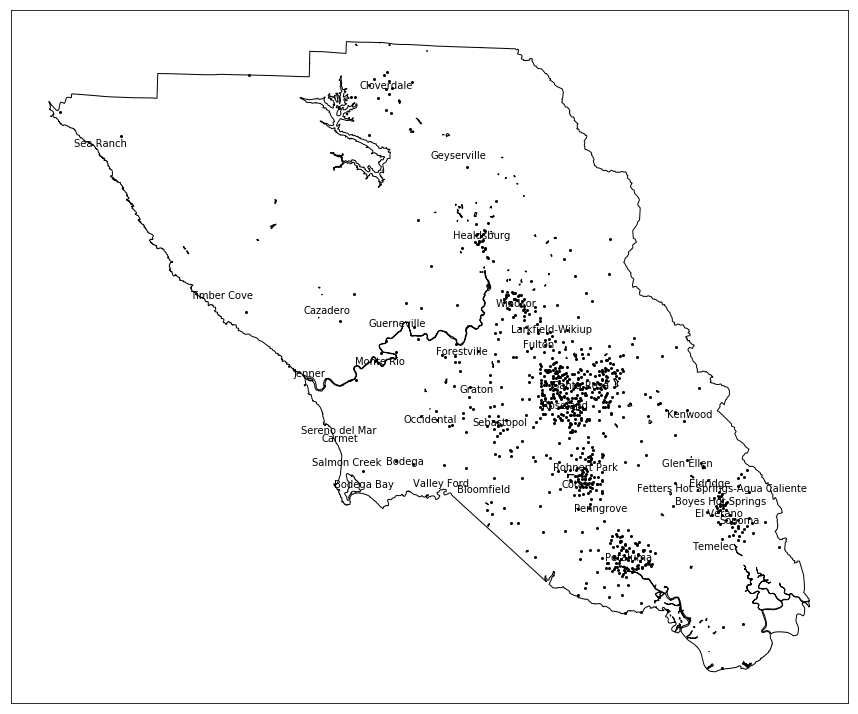

In [52]:
county_plot('06097', pts_per_person = 500, epsg = 3310)

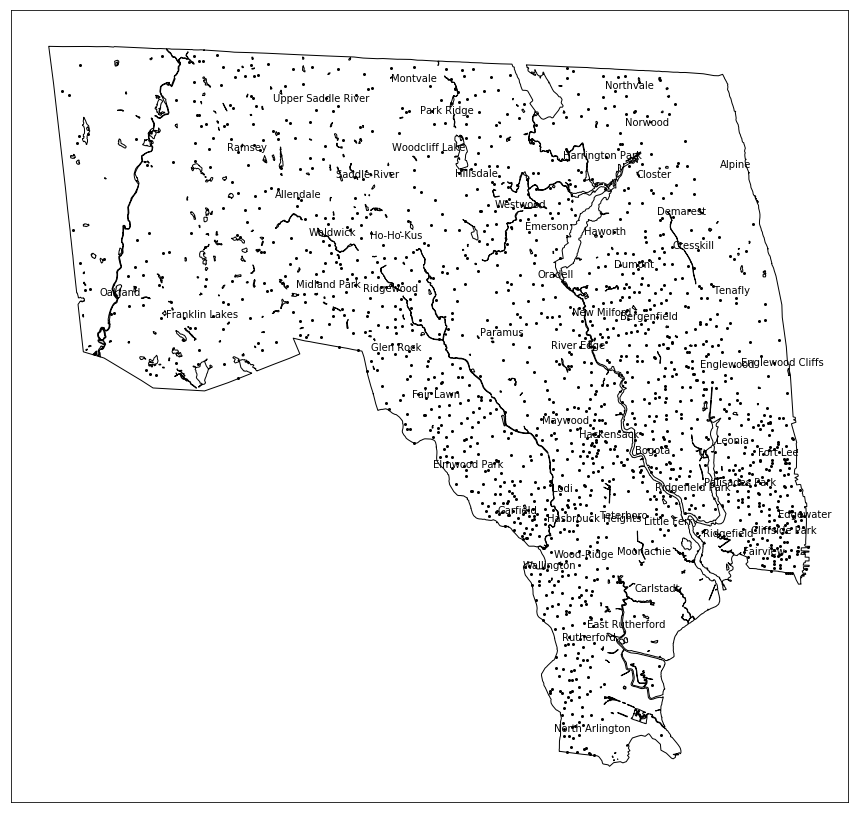

In [53]:
county_plot('34003', pts_per_person = 500, epsg = 3310)